In [ ]:
# BLOC : IMPORTATIONS
import pandas as pd # to do dataframes
import numpy as np # to do calculations
import yfinance as yf # for financial informations
import matplotlib.pyplot as plt # plots ... ggplot2
import seaborn as sns # visualisations

# More and more NLP is used
from wordcloud import WordCloud # just to take a subset of the library
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Printing the context / statement
print("Corporate Strategy")
print("Overview of Porsche : a German automotive giant")

Corporate Strategy
Overview of Porsche : a German automotive giant


ERROR:yfinance:$PORSCHE.PA: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")
<ipython-input-4-d2c66fe9f588>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2019-01-01", periods=60, freq='M')


Using sample data as Porsche stock data may not be public.


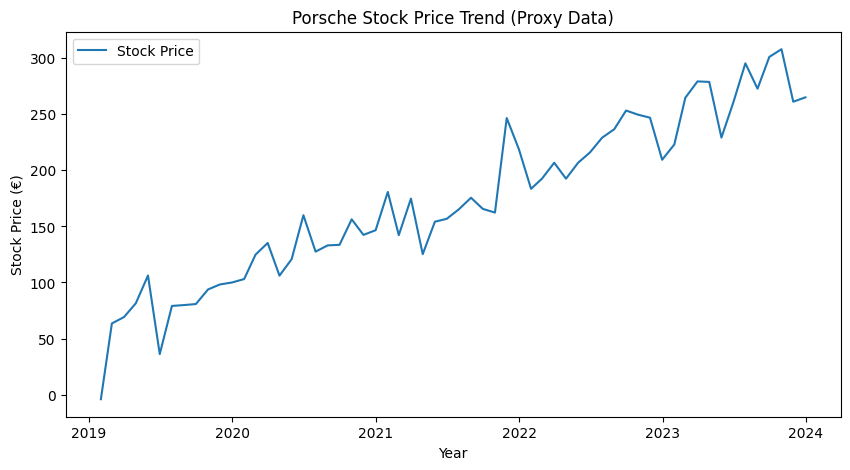

In [ ]:
# Financial analysis
try:
  porsche_stock = yf.Ticker("PORSCHE.PA")
  porsche_hist = porsche_stock.history(period="5y")
  if porsche_hist.empty:
    raise ValueError("Data empty")

except :
  print("Using sample data as Porsche stock data may not be public.")
  dates = pd.date_range(start="2019-01-01", periods=60, freq='M')
  prices = np.linspace(50,300,60) + np.random.normal(0,20,60)
  porsche_hist = pd.DataFrame({"Date": dates, "Close":prices}).set_index("Date")

# Plot stock trends
plt.figure(figsize=(10,5))
sns.lineplot(data=porsche_hist, x=porsche_hist.index, y="Close", label="Stock Price")
plt.title("Porsche Stock Price Trend (Proxy Data)")
plt.xlabel("Year")
plt.ylabel("Stock Price (€)")
plt.legend()
plt.show()

<ipython-input-5-bf308e728946>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(forces.keys()), y=list(forces.values()), palette="Blues")


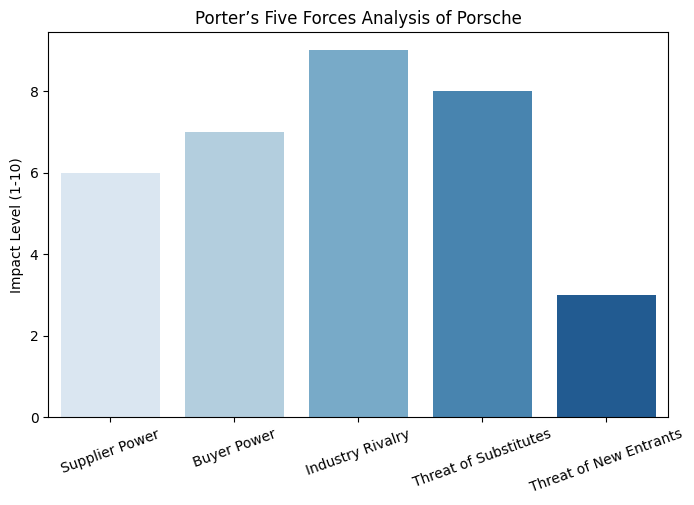

In [ ]:
# Section 3: Competitive Analysis using Porter’s Five Forces
forces = {"Supplier Power": 6, "Buyer Power": 7, "Industry Rivalry": 9, "Threat of Substitutes": 8, "Threat of New Entrants": 3}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(forces.keys()), y=list(forces.values()), palette="Blues")
plt.title("Porter’s Five Forces Analysis of Porsche")
plt.ylabel("Impact Level (1-10)")
plt.xticks(rotation=20)
plt.show()

In [ ]:
years = list(range(2024, 2031))
scenarios = {"Pessimistic": 0.02, "Neutral": 0.05, "Optimistic": 0.08}
initial_revenue = 40000  # in million €
cogs_ratio = 0.6
operating_expenses_growth = 0.03
depreciation_growth = 0.02
interest_expense = 500
tax_rate = 0.25
initial_operating_expenses = 5000
initial_depreciation = 2000

In [ ]:
data = {"Year": years}
for scenario, growth_rate in scenarios.items():
  revenue = [initial_revenue * (1 + growth_rate) ** (year - 2024) for year in years]
  cogs = [r * cogs_ratio for r in revenue]
  gross_profit = [r - c for r, c in zip(revenue, cogs)]
  operating_expenses = [initial_operating_expenses * (1 + operating_expenses_growth) ** (year - 2024) for year in years]
  ebitda = [gp - op for gp, op in zip(gross_profit, operating_expenses)]
  depreciation = [initial_depreciation * (1 + depreciation_growth) ** (year - 2024) for year in years]
  ebit = [e - d for e, d in zip(ebitda, depreciation)]
  ebt = [e - interest_expense for e in ebit]
  tax = [e * tax_rate for e in ebt]
  net_income = [e - t for e, t in zip(ebt, tax)]
  roi = [ni / r for ni, r in zip(net_income, revenue)]

In [ ]:
data[f"Revenue ({scenario}) (€M)"] = revenue
data[f"COGS ({scenario}) (€M)"] = cogs
data[f"Gross Profit ({scenario}) (€M)"] = gross_profit
data[f"Operating Expenses ({scenario}) (€M)"] = operating_expenses
data[f"EBITDA ({scenario}) (€M)"] = ebitda
data[f"Depreciation ({scenario}) (€M)"] = depreciation
data[f"EBIT ({scenario}) (€M)"] = ebit
data[f"EBT ({scenario}) (€M)"] = ebt
data[f"Tax ({scenario}) (€M)"] = tax
data[f"Net Income ({scenario}) (€M)"] = net_income
data[f"ROI ({scenario})"] = roi

In [ ]:
df = pd.DataFrame(data)
print(df)

   Year  Revenue (Optimistic) (€M)  COGS (Optimistic) (€M)  \
0  2024               40000.000000            24000.000000   
1  2025               43200.000000            25920.000000   
2  2026               46656.000000            27993.600000   
3  2027               50388.480000            30233.088000   
4  2028               54419.558400            32651.735040   
5  2029               58773.123072            35263.873843   
6  2030               63474.972918            38084.983751   

   Gross Profit (Optimistic) (€M)  Operating Expenses (Optimistic) (€M)  \
0                    16000.000000                           5000.000000   
1                    17280.000000                           5150.000000   
2                    18662.400000                           5304.500000   
3                    20155.392000                           5463.635000   
4                    21767.823360                           5627.544050   
5                    23509.249229                    

In [ ]:
df

,Year,Revenue (Optimistic) (€M),COGS (Optimistic) (€M),Gross Profit (Optimistic) (€M),Operating Expenses (Optimistic) (€M),EBITDA (Optimistic) (€M),Depreciation (Optimistic) (€M),EBIT (Optimistic) (€M),EBT (Optimistic) (€M),Tax (Optimistic) (€M),Net Income (Optimistic) (€M),ROI (Optimistic)
0,2024,40000.000000,24000.000000,16000.000000,5000.000000,11000.000000,2000.000000,9000.000000,8500.000000,2125.000000,6375.000000,0.159375
1,2025,43200.000000,25920.000000,17280.000000,5150.000000,12130.000000,2040.000000,10090.000000,9590.000000,2397.500000,7192.500000,0.166493
2,2026,46656.000000,27993.600000,18662.400000,5304.500000,13357.900000,2080.800000,11277.100000,10777.100000,2694.275000,8082.825000,0.173243
3,2027,50388.480000,30233.088000,20155.392000,5463.635000,14691.757000,2122.416000,12569.341000,12069.341000,3017.335250,9052.005750,0.179644
4,2028,54419.558400,32651.735040,21767.823360,5627.544050,16140.279310,2164.864320,13975.414990,13475.414990,3368.853748,10106.561243,0.185716
5,2029,58773.123072,35263.873843,23509.249229,5796.370372,17712.878857,2208.161606,15504.717251,15004.717251,3751.179313,11253.537938,0.191474
6,2030,63474.972918,38084.983751,25389.989167,5970.261483,19419.727684,2252.324839,17167.402846,16667.402846,4166.850711,12500.552134,0.196937


In [ ]:
df.describe()

,Year,Revenue (Optimistic) (€M),COGS (Optimistic) (€M),Gross Profit (Optimistic) (€M),Operating Expenses (Optimistic) (€M),EBITDA (Optimistic) (€M),Depreciation (Optimistic) (€M),EBIT (Optimistic) (€M),EBT (Optimistic) (€M),Tax (Optimistic) (€M),Net Income (Optimistic) (€M),ROI (Optimistic)
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2027.000000,50987.447770,30592.468662,20394.979108,5473.187272,14921.791836,2124.080966,12797.710870,12297.710870,3074.427717,9223.283152,0.178983
std,2.160247,8454.022327,5072.413396,3381.608931,349.346760,3032.587782,90.848808,2941.875669,2941.875669,735.468917,2206.406752,0.013525
min,2024.000000,40000.000000,24000.000000,16000.000000,5000.000000,11000.000000,2000.000000,9000.000000,8500.000000,2125.000000,6375.000000,0.159375
25%,2025.500000,44928.000000,26956.800000,17971.200000,5227.250000,12743.950000,2060.400000,10683.550000,10183.550000,2545.887500,7637.662500,0.169868
50%,2027.000000,50388.480000,30233.088000,20155.392000,5463.635000,14691.757000,2122.416000,12569.341000,12069.341000,3017.335250,9052.005750,0.179644
75%,2028.500000,56596.340736,33957.804442,22638.536294,5711.957211,16926.579084,2186.512963,14740.066120,14240.066120,3560.016530,10680.049590,0.188595
max,2030.000000,63474.972918,38084.983751,25389.989167,5970.261483,19419.727684,2252.324839,17167.402846,16667.402846,4166.850711,12500.552134,0.196937


Porsche Group Revenue Projections Analysis

Historical Revenue (2018-2024):
2018: €25.8 billion
2019: €28.5 billion
2020: €28.7 billion
2021: €33.1 billion
2022: €37.6 billion
2023: €40.5 billion
2024: €42.1 billion

Projected Revenue (2025-2029):
   Year  Pessimistic Revenue  Neutral Revenue  Optimistic Revenue  \
0  2025                41.94            44.40               45.86   
1  2026                42.06            46.66               48.83   
2  2027                42.13            48.91               51.40   
3  2028                43.16            51.57               55.67   
4  2029                44.33            53.00               59.48   

   Pessimistic YoY Growth  Neutral YoY Growth  Optimistic YoY Growth  
0                   -0.00                0.05                   0.09  
1                    0.00                0.05                   0.06  
2                    0.00                0.05                   0.05  
3                    0.02                0.05        

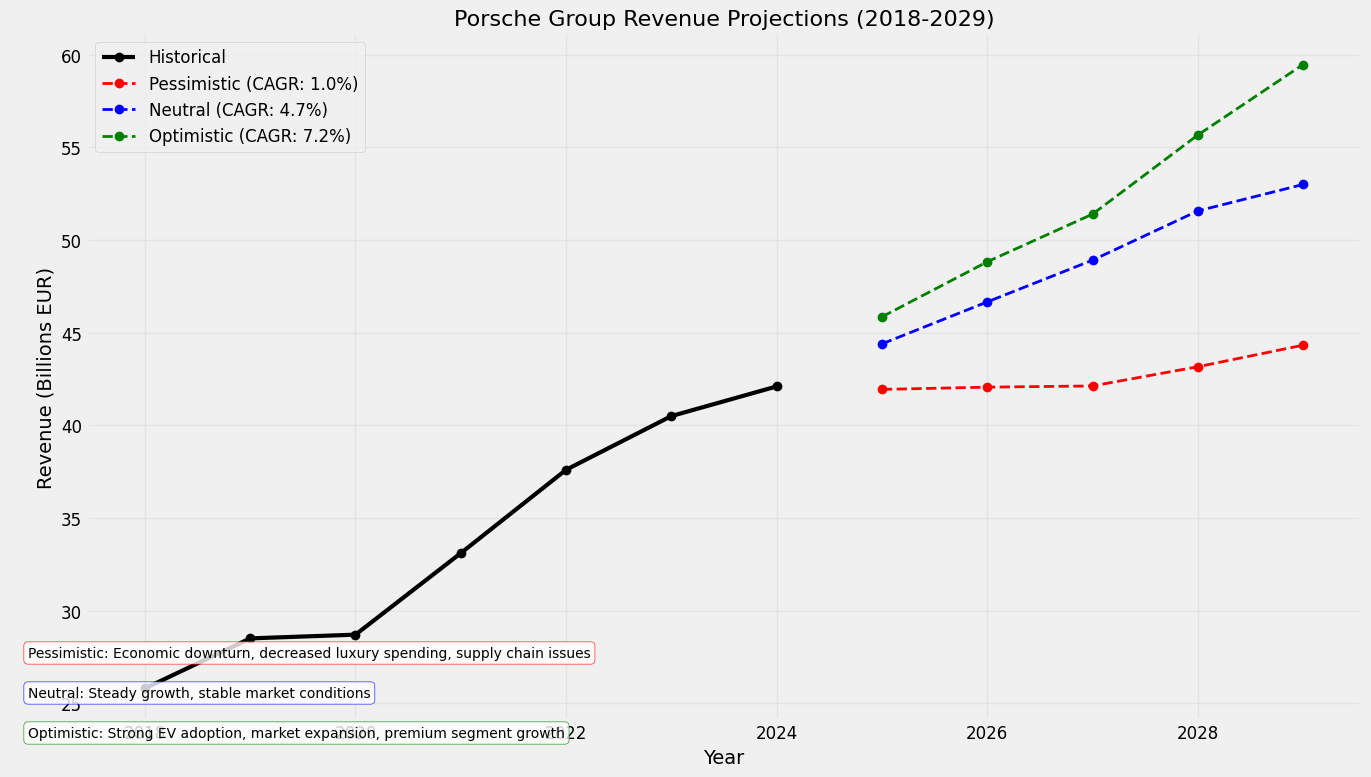

AttributeError: module 'matplotlib.pyplot' has no attribute 'font_manager'

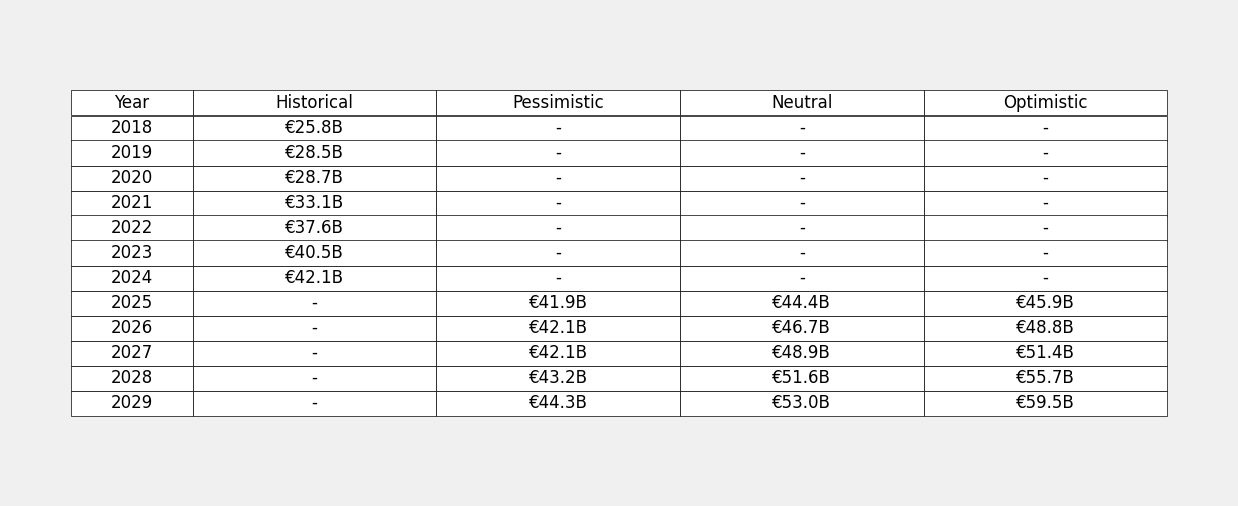

In [ ]:
# Set the style for better visualizations
plt.style.use('fivethirtyeight')
sns.set_palette("deep")

# Sample historical revenue data for Porsche Group (in billions of EUR)
# Based on approximate recent performance
historical_revenue = {
    2018: 25.8,
    2019: 28.5,
    2020: 28.7,  # COVID impact
    2021: 33.1,
    2022: 37.6,
    2023: 40.5,
    2024: 42.1
}

# Create DataFrame from historical data
df_historical = pd.DataFrame(list(historical_revenue.items()), columns=['Year', 'Revenue'])
df_historical['Revenue_Type'] = 'Historical'

# Function to generate projections
def generate_projections(years_to_project=5):
    current_year = 2024
    projection_years = range(current_year + 1, current_year + years_to_project + 1)

    # Growth rate scenarios
    scenarios = {
        'Pessimistic': {
            'growth_rate': np.linspace(0.01, 0.02, years_to_project),  # 1-2% growth
            'volatility': 0.01,  # Low volatility
            'description': 'Economic downturn, decreased luxury spending, supply chain issues'
        },
        'Neutral': {
            'growth_rate': np.linspace(0.03, 0.05, years_to_project),  # 3-5% growth
            'volatility': 0.015,  # Medium volatility
            'description': 'Steady growth, stable market conditions'
        },
        'Optimistic': {
            'growth_rate': np.linspace(0.06, 0.08, years_to_project),  # 6-8% growth
            'volatility': 0.02,  # Higher volatility
            'description': 'Strong EV adoption, market expansion, premium segment growth'
        }
    }

    # Get the latest historical revenue
    latest_revenue = historical_revenue[current_year]

    # Initialize dictionary to store projections
    projections = {}

    # Generate projections for each scenario
    for scenario, params in scenarios.items():
        revenues = [latest_revenue]

        for i, year in enumerate(projection_years):
            # Calculate growth with some randomness
            growth_factor = 1 + params['growth_rate'][i] + np.random.normal(0, params['volatility'])
            new_revenue = revenues[-1] * growth_factor
            revenues.append(new_revenue)

        # Store projections excluding the initial value (which is the latest historical)
        projections[scenario] = dict(zip(projection_years, revenues[1:]))

    return projections, scenarios

# Generate projections
projections, scenarios_info = generate_projections()

# Create DataFrame for projections
projection_data = []
for scenario, data in projections.items():
    for year, revenue in data.items():
        projection_data.append([year, revenue, scenario])

df_projections = pd.DataFrame(projection_data, columns=['Year', 'Revenue', 'Revenue_Type'])

# Combine historical and projection data
df_combined = pd.concat([df_historical, df_projections])

# Calculate compound annual growth rate (CAGR) for each scenario
def calculate_cagr(start_value, end_value, years):
    return (end_value / start_value) ** (1 / years) - 1

cagr_data = {}
for scenario in ['Pessimistic', 'Neutral', 'Optimistic']:
    scenario_data = df_projections[df_projections['Revenue_Type'] == scenario]
    start_year = min(scenario_data['Year'])
    end_year = max(scenario_data['Year'])
    start_value = historical_revenue[2024]  # Last historical value
    end_value = scenario_data[scenario_data['Year'] == end_year]['Revenue'].values[0]
    years = end_year - 2024

    cagr = calculate_cagr(start_value, end_value, years)
    cagr_data[scenario] = cagr

# Plot the projections
plt.figure(figsize=(14, 8))

# Historical data
historical_years = df_historical['Year']
historical_revenue_values = df_historical['Revenue']
plt.plot(historical_years, historical_revenue_values, 'o-', linewidth=3, color='black', label='Historical')

# Projections by scenario
colors = {'Pessimistic': 'red', 'Neutral': 'blue', 'Optimistic': 'green'}
for scenario in ['Pessimistic', 'Neutral', 'Optimistic']:
    scenario_data = df_projections[df_projections['Revenue_Type'] == scenario]
    plt.plot(scenario_data['Year'], scenario_data['Revenue'], 'o--', linewidth=2,
             color=colors[scenario], label=f"{scenario} (CAGR: {cagr_data[scenario]:.1%})")

plt.title('Porsche Group Revenue Projections (2018-2029)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Revenue (Billions EUR)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate with scenario descriptions
y_pos = max(df_combined['Revenue']) * 0.7
for i, (scenario, info) in enumerate(scenarios_info.items()):
    plt.annotate(f"{scenario}: {info['description']}",
                 xy=(0.02, 0.15 - i*0.05),
                 xycoords='figure fraction',
                 fontsize=10,
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=colors[scenario], alpha=0.8))

# Generate a detailed analysis report
def generate_financial_report(historical, projections, cagr_data):
    report = pd.DataFrame()

    # Historical data summary
    historical_growth = []
    for i in range(1, len(historical)):
        year = list(historical.keys())[i]
        prev_year = list(historical.keys())[i-1]
        growth = (historical[year] / historical[prev_year]) - 1
        historical_growth.append(growth)

    avg_historical_growth = np.mean(historical_growth)

    # Create report structure
    years = sorted(list(set([year for scenario in projections.values() for year in scenario.keys()])))

    # Initialize the DataFrame with years
    report['Year'] = years

    # Add revenue projections for each scenario
    for scenario in projections.keys():
        scenario_data = projections[scenario]
        report[f'{scenario} Revenue'] = [scenario_data.get(year, None) for year in years]

    # Calculate year-over-year growth rates
    for scenario in projections.keys():
        growth_rates = []
        for i in range(len(years)):
            if i == 0:
                # First projected year compared to last historical year
                growth = (report[f'{scenario} Revenue'][i] / historical[2024]) - 1
            else:
                # Compare to previous projected year
                growth = (report[f'{scenario} Revenue'][i] / report[f'{scenario} Revenue'][i-1]) - 1
            growth_rates.append(growth)

        report[f'{scenario} YoY Growth'] = growth_rates

    # Add CAGR for each scenario
    report_summary = pd.DataFrame({
        'Scenario': list(projections.keys()),
        'CAGR (2024-2029)': [cagr_data[scenario] for scenario in projections.keys()],
        'Avg Historical Growth (2018-2024)': [avg_historical_growth] * len(projections)
    })

    return report, report_summary

# Generate the financial report
financial_report, report_summary = generate_financial_report(historical_revenue, projections, cagr_data)

# Display the results
print("Porsche Group Revenue Projections Analysis")
print("==========================================")
print(f"\nHistorical Revenue (2018-2024):")
for year, revenue in historical_revenue.items():
    print(f"{year}: €{revenue:.1f} billion")

print("\nProjected Revenue (2025-2029):")
print(financial_report.round(2))

print("\nFinancial Analysis Summary:")
print(report_summary.round(4))

# Display the plot
plt.tight_layout()
plt.show()

# Create a table visualization of the projections
plt.figure(figsize=(14, 6))
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# Format projection data for table display
table_data = []
table_data.append(['Year', 'Historical', 'Pessimistic', 'Neutral', 'Optimistic'])

for year in range(2018, 2030):
    row = [str(year)]

    # Historical
    if year in historical_revenue:
        row.append(f"€{historical_revenue[year]:.1f}B")
    else:
        row.append("-")

    # Projections
    if year > 2024:
        for scenario in ['Pessimistic', 'Neutral', 'Optimistic']:
            scenario_data = projections[scenario]
            if year in scenario_data:
                row.append(f"€{scenario_data[year]:.1f}B")
            else:
                row.append("-")
    else:
        row.extend(["-", "-", "-"])

    table_data.append(row)

# Create table
table = plt.table(
    cellText=table_data,
    cellLoc='center',
    loc='center',
    colWidths=[0.1, 0.2, 0.2, 0.2, 0.2]
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(fontproperties=plt.font_manager.FontProperties(weight='bold'))
        cell.set_facecolor('#4472C4')
        cell.set_text_props(color='white')
    elif col == 0:
        cell.set_text_props(fontproperties=plt.font_manager.FontProperties(weight='bold'))
        cell.set_facecolor('#8EA9DB')
    elif row % 2 == 0:
        cell.set_facecolor('#D9E1F2')

plt.suptitle('Porsche Group Revenue Projections (in Billions EUR)', fontsize=16, y=0.95)
plt.figtext(0.5, 0.01, 'Generated on ' + datetime.now().strftime("%Y-%m-%d"), ha='center')
plt.show()